# ❤️ Heart Disease Risk Analysis — Exploratory Data Analysis (EDA)

Understanding key risk factors affecting 10-year coronary heart disease risk using the **Framingham Heart Study dataset**.

This notebook focuses on:
- ✅ Data cleaning & preprocessing
- ✅ Exploratory Data Analysis (EDA)
- ✅ Identifying major cardiovascular risk factors
- ✅ Medical + data-driven interpretation of results

### 🎯 Goal
Discover which lifestyle, biological, and demographic factors most contribute to heart disease risk.

### 📊 Dataset
**Framingham Heart Study**  
Records: ~4,000  
Features: age, sex, blood pressure, cholesterol, BMI, smoking, diabetes, etc.

Source: Kaggle (Framingham Heart Disease Dataset)

### 💡 Why this project matters
Heart disease remains the **#1 global cause of death**.  
Understanding risk patterns supports early prevention and informed health decisions.

---


In [1]:
# ===========================
# 📦 Imports & Global Settings
# ===========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Visualization style
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

# Helper functions for styling
def annotate_bars(ax, fmt="{:,.0f}", dy=0.01):
    """Add labels on top of bars."""
    ymax = ax.get_ylim()[1]
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + dy*ymax, fmt.format(h),
                ha="center", va="bottom", fontsize=10, color="black")

def add_subtitle(fig, text, y=0.92, size=11):
    """Place a subtitle under the title."""
    fig.text(0.5, y, text, ha='center', fontsize=size)


## 📁 Load Dataset & Quick Preview

The dataset tracks cardiovascular health indicators and whether a patient developed heart disease within 10 years.


In [2]:
# Load the dataset
df = pd.read_csv('framingham.csv')

# Preview
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


## 🧼 Data Understanding & Cleaning

Before analysis, we inspect the dataset to identify data quality issues:

- Data types
- Missing values
- Range sanity checks
- Target balance


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)


In [9]:
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)

In [10]:
# Fill education with mode
df['education'].fillna(df['education'].mode()[0], inplace=True)


# Option 2: fill glucose with median (simpler for now)
df['glucose'].fillna(df['glucose'].median(), inplace=True)


In [11]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot: xlabel='TenYearCHD', ylabel='count'>

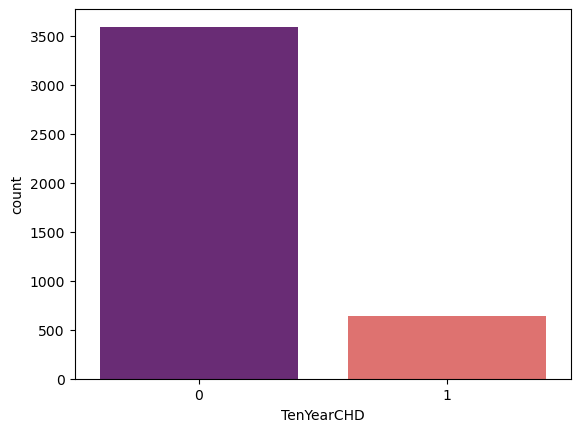

In [13]:
sns.countplot(data=df,x='TenYearCHD',palette="magma")

# 1. Age vs CHD

<AxesSubplot: xlabel='age', ylabel='Count'>

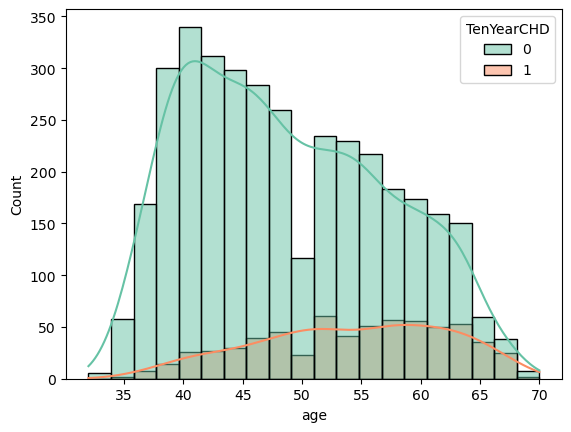

In [14]:

sns.histplot(x="age", hue="TenYearCHD", data=df, bins=20, kde=True, palette="Set2")


**Narrative:**

The distribution shows that CHD cases are more frequent among older individuals, especially after age 50. Younger participants rarely develop CHD, confirming age as a strong risk factor.

#  2.Smoking vs CHD

<AxesSubplot: xlabel='currentSmoker', ylabel='count'>

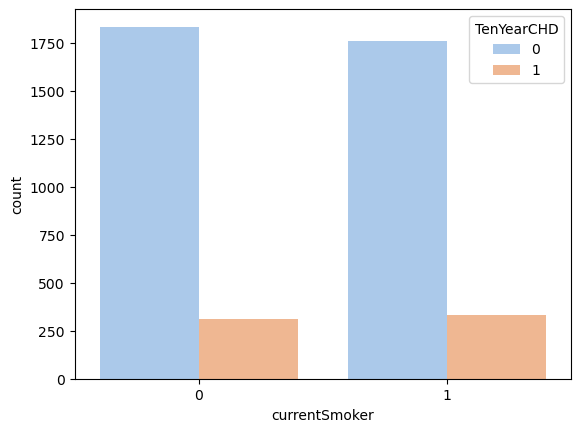

In [15]:

sns.countplot(x="currentSmoker", hue="TenYearCHD", data=df, palette="pastel")


**Narrative:**

Smokers represent a significant portion of CHD cases compared to non-smokers, highlighting smoking as a critical lifestyle risk factor for cardiovascular disease.

# 3.Cholesterol vs CHD

<AxesSubplot: xlabel='TenYearCHD', ylabel='totChol'>

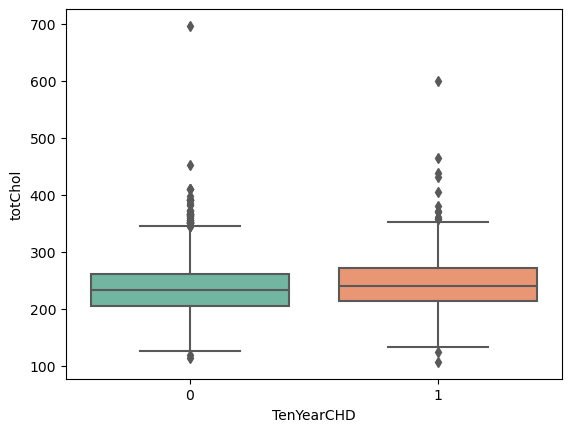

In [16]:
sns.boxplot(x="TenYearCHD", y="totChol", data=df, palette="Set2")


**Narrative:**

Individuals with CHD tend to have higher cholesterol levels. This aligns with medical research showing high cholesterol as a major contributor to heart disease.

# 4.Blood Pressure vs CHD

<AxesSubplot: xlabel='TenYearCHD', ylabel='sysBP'>

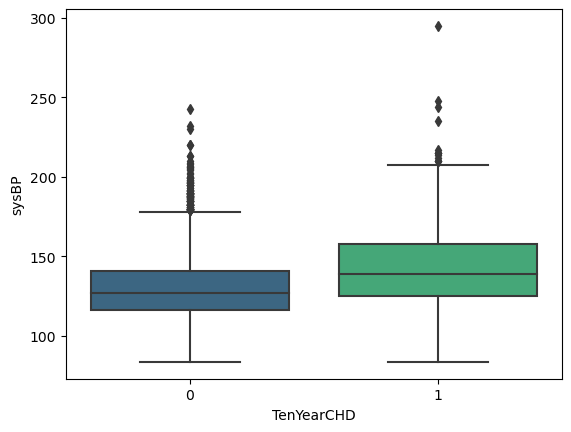

In [17]:
sns.boxplot(x="TenYearCHD", y="sysBP", data=df, palette="viridis")


**arrative:**

Systolic blood pressure is noticeably higher in participants with CHD. Hypertension appears to be another key differentiator between healthy individuals and those at risk.

# 5.Diabetes vs CHD

<AxesSubplot: xlabel='diabetes', ylabel='count'>

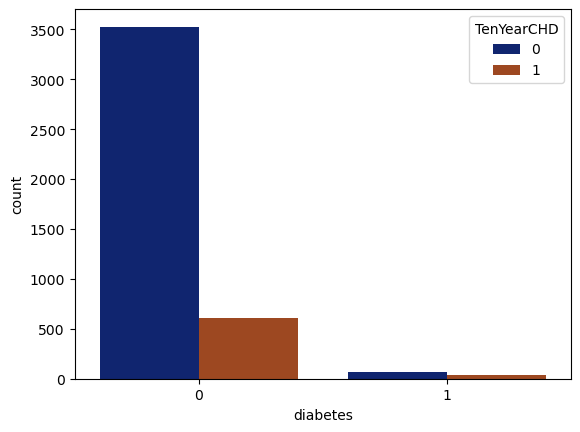

In [18]:
sns.countplot(x="diabetes", hue="TenYearCHD", data=df, palette="dark")


**Narrative**

Participants with diabetes have a higher proportion of CHD cases compared to non-diabetics. Although the absolute number of diabetic patients is smaller in this dataset, the relative risk is significantly higher, supporting the strong link between diabetes and cardiovascular disease

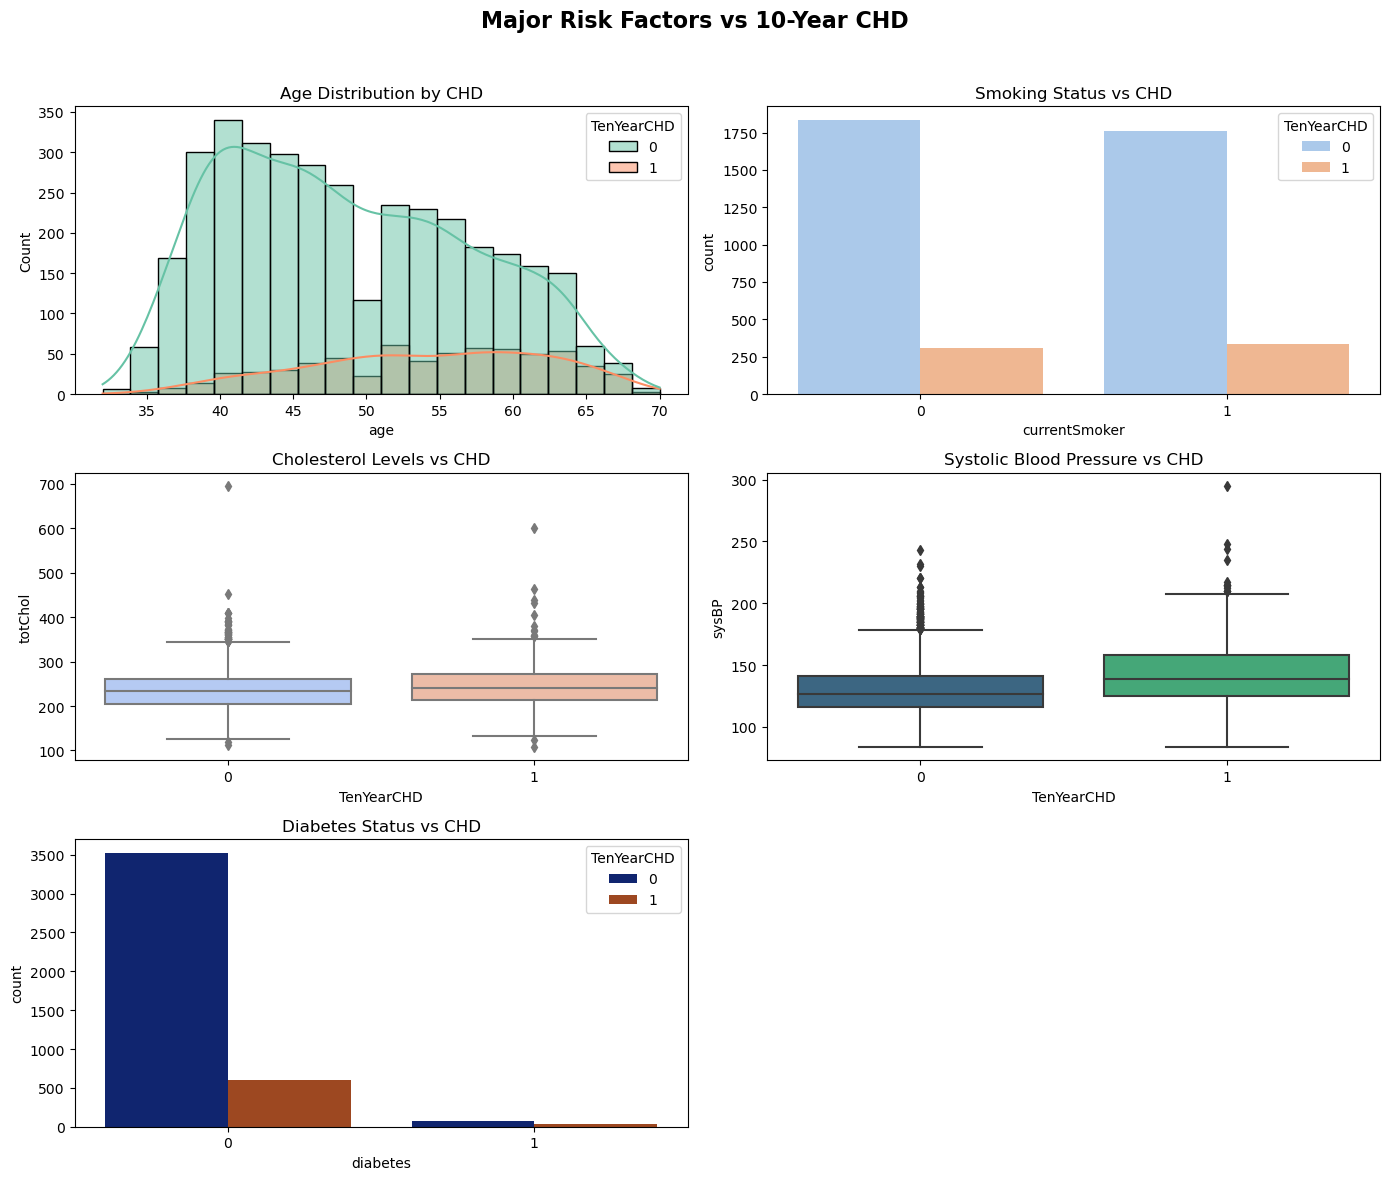

In [19]:


fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Major Risk Factors vs 10-Year CHD", fontsize=16, fontweight="bold")

# 1. Age vs CHD
sns.histplot(x="age", hue="TenYearCHD", data=df, bins=20, kde=True, palette="Set2", ax=axes[0,0])
axes[0,0].set_title("Age Distribution by CHD")

# 2. Smoking vs CHD
sns.countplot(x="currentSmoker", hue="TenYearCHD", data=df, palette="pastel", ax=axes[0,1])
axes[0,1].set_title("Smoking Status vs CHD")

# 3. Cholesterol vs CHD
sns.boxplot(x="TenYearCHD", y="totChol", data=df, palette="coolwarm", ax=axes[1,0])
axes[1,0].set_title("Cholesterol Levels vs CHD")

# 4. Blood Pressure vs CHD
sns.boxplot(x="TenYearCHD", y="sysBP", data=df, palette="viridis", ax=axes[1,1])
axes[1,1].set_title("Systolic Blood Pressure vs CHD")

# 5. Diabetes vs CHD
sns.countplot(x="diabetes", hue="TenYearCHD", data=df, palette="dark", ax=axes[2,0])
axes[2,0].set_title("Diabetes Status vs CHD")

# Remove the last empty subplot
fig.delaxes(axes[2,1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()









## Polished Summary

In this exploratory analysis of the Framingham Heart Study dataset, several key patterns emerge:

• Age: The risk of CHD increases sharply with age, especially after 50.

• Smoking: Smokers show a noticeably higher rate of CHD compared to non-smokers.

• Cholesterol: Participants with higher total cholesterol tend to have more CHD cases.

• Blood Pressure: Elevated systolic blood pressure is strongly associated with CHD.

• Diabetes: Although fewer participants have diabetes, their relative risk of CHD is substantially higher.

These findings align well with established medical knowledge, confirming that age, smoking, cholesterol, blood pressure, and diabetes are major risk factors for coronary heart disease

<AxesSubplot: >

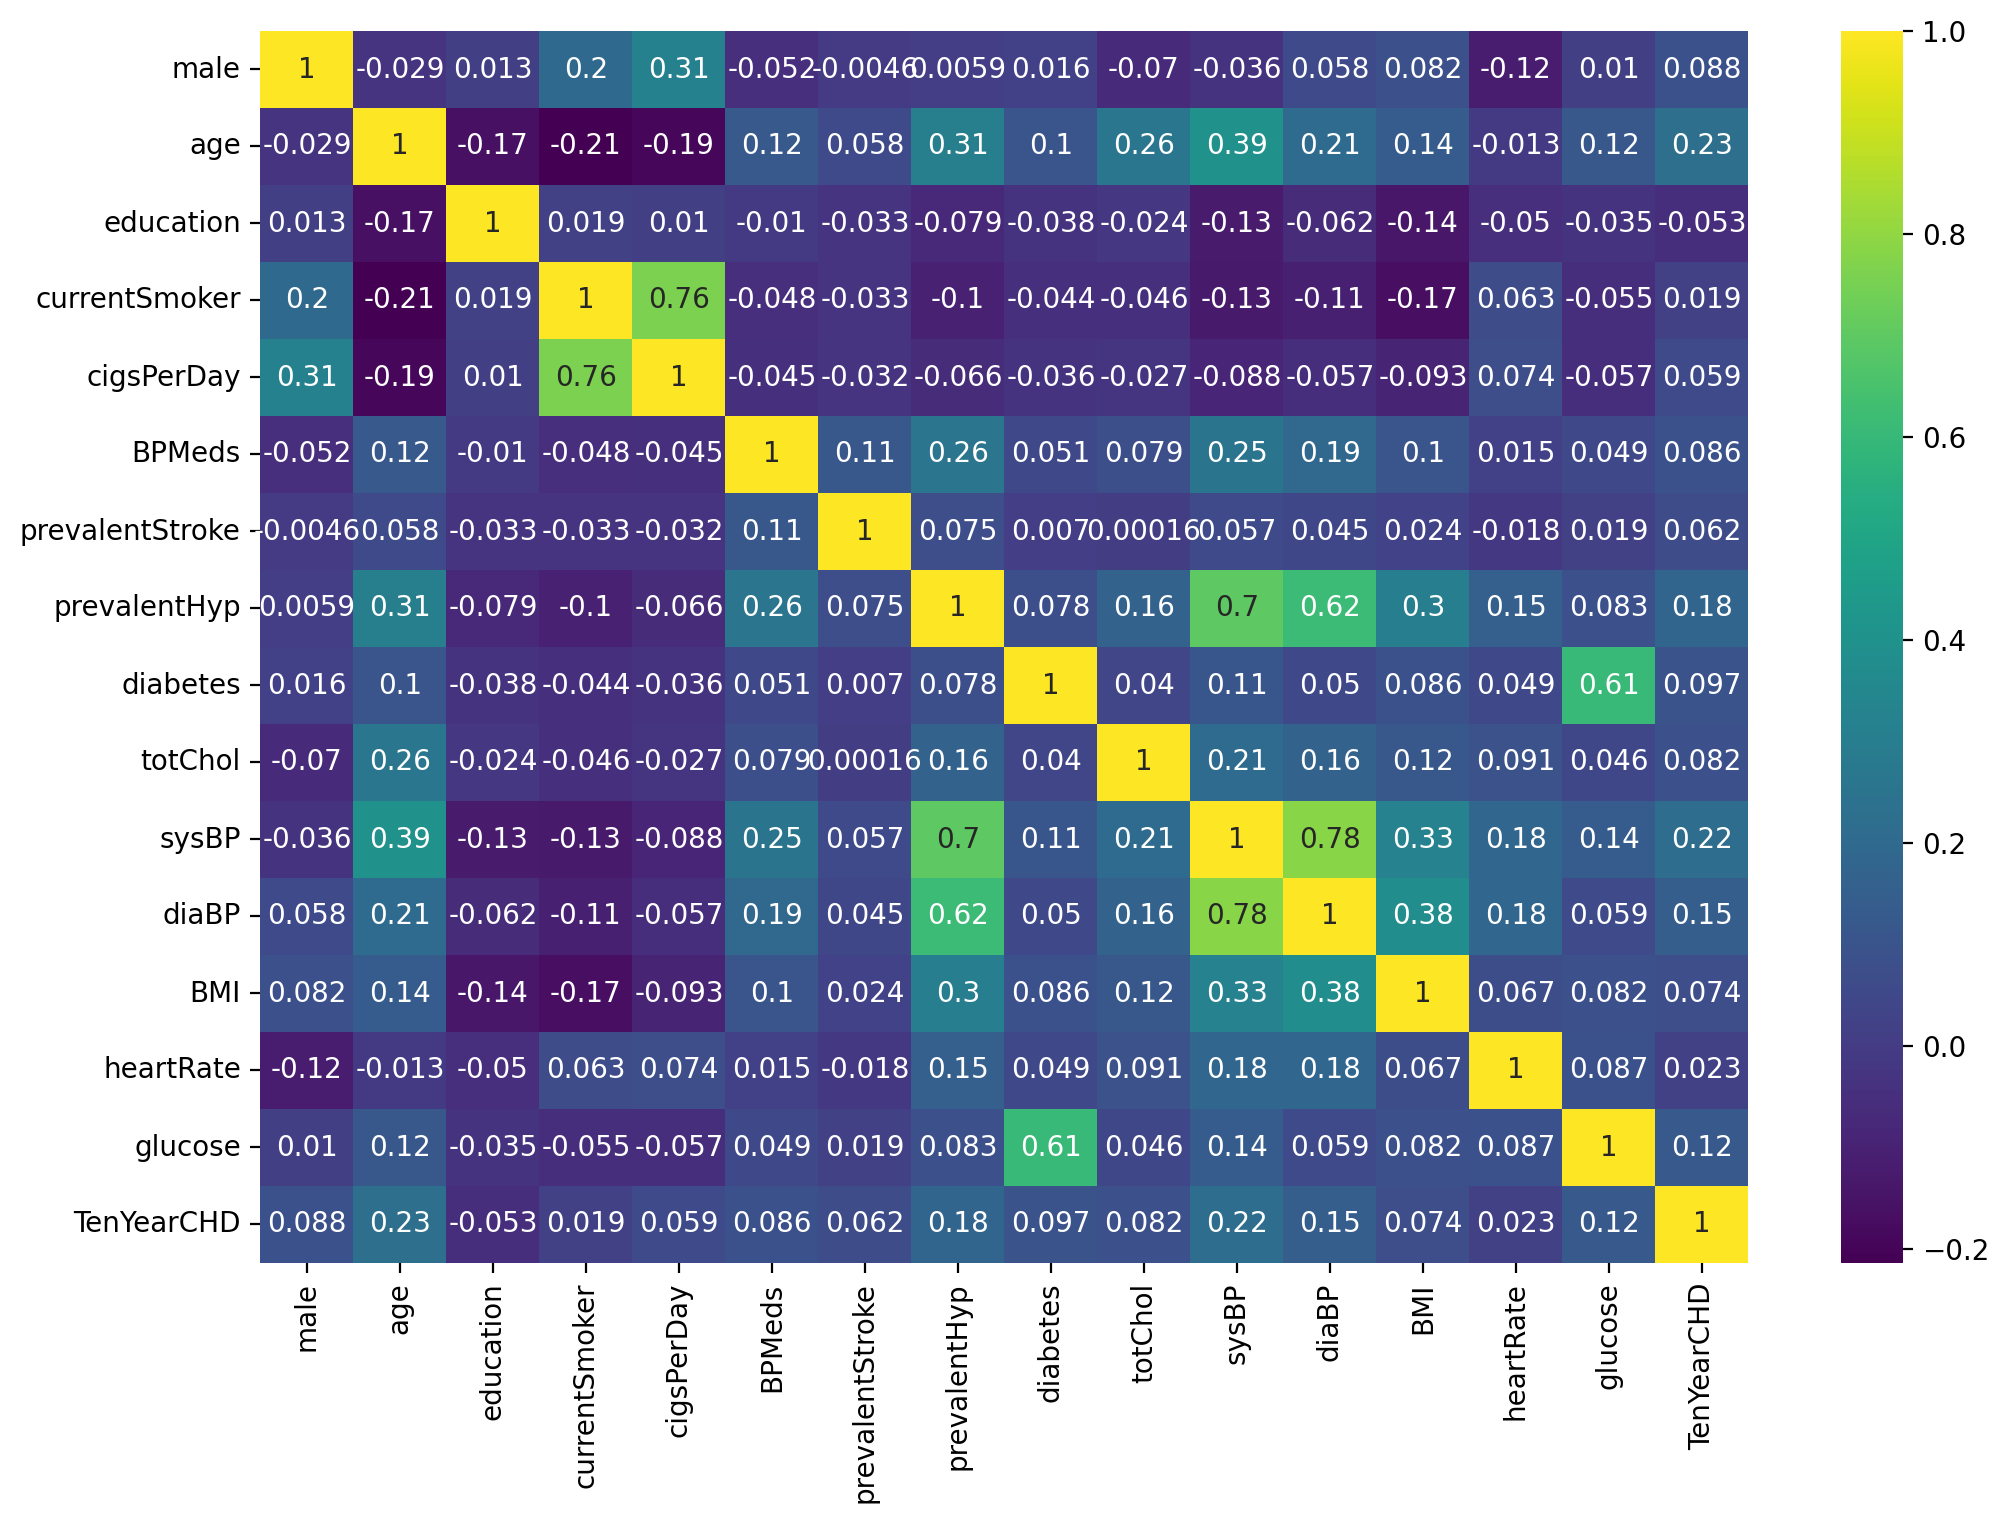

In [20]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

<AxesSubplot: xlabel='BMI', ylabel='age'>

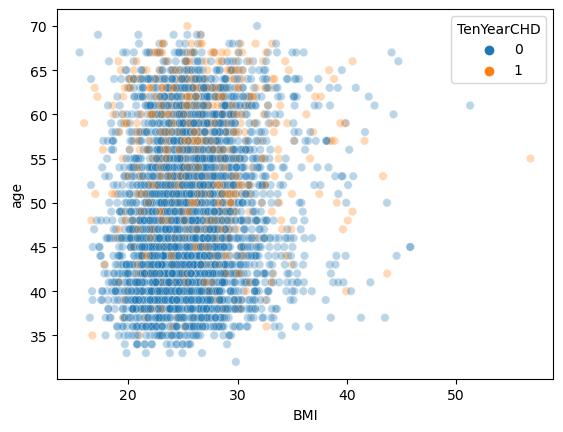

In [21]:
sns.scatterplot(data=df,x='BMI',y='age',hue='TenYearCHD',alpha=0.3)

In [22]:
df.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot: xlabel='totChol', ylabel='diaBP'>

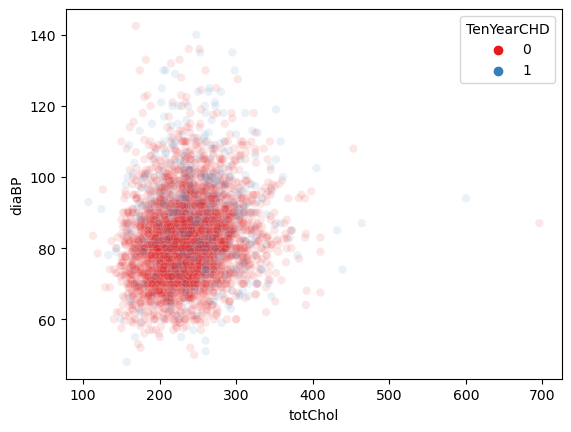

In [23]:
sns.scatterplot(data=df,x='totChol',y='diaBP',hue='TenYearCHD',palette='Set1',alpha=0.1)

In [24]:
corr = df['diaBP'].corr(df['totChol'])
print("Correlation coefficient:", corr)


Correlation coefficient: 0.1634082091094448


In [27]:
df.to_csv("../project1/cleaned_heart.csv",index=False)